In [1]:
from feature_selector import FeatureSelector

import pandas as pd

In [2]:

train = pd.read_csv('final_dataset2.csv')
train_labels = train['Found / Not Found']
train.head()

,eval(),"Number(fromcharcode,charcodeAt,charAt)",concat(),iframe,unescap(),escape(),search(),setAttribute(),toStiring(),parseInt(),...,No. of Digite,No. of % character,No. of \ charecters,encodeURIComponent,decodeURIComponent,No. of ';' charecters,No. of '#' charecters,No. of '+' charecters,No. of ' charecters,Found / Not Found
0,0,0,0,0,0,0,0,0,0,0,...,133,0,0,0,0,61,0,33,0,0
1,0,0,0,1,0,0,0,0,0,0,...,44,0,2,0,0,13,10,15,30,0
2,1,8,0,0,0,0,0,0,0,0,...,736,0,0,0,0,18,0,14,6,1
3,0,0,0,1,0,0,0,0,0,0,...,256,12,0,0,0,1241,7,154,716,0
4,0,0,0,0,0,0,1,0,0,0,...,10,0,0,4,0,9,0,16,28,1


In [3]:

fs = FeatureSelector(data = train, labels = train_labels)

In [4]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [5]:
fs.missing_stats.head()

,missing_fraction
eval(),0.0
function,0.0
onload(),0.0
dispatchEvent,0.0
.js,0.0


In [6]:
missing_features = fs.ops['missing']
missing_features

[]

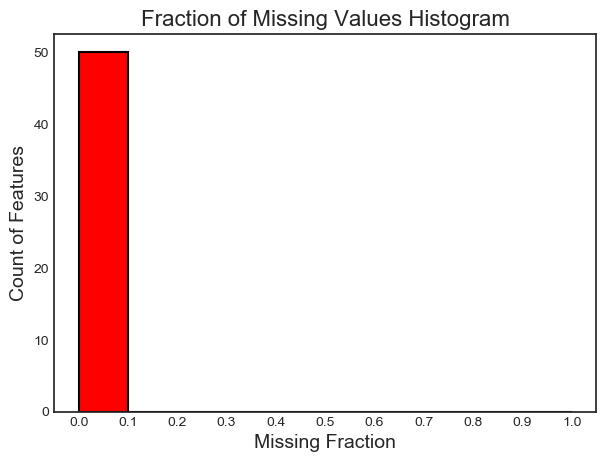

In [7]:
fs.plot_missing()

In [8]:
fs.missing_stats.head(60)

,missing_fraction
eval(),0.0
function,0.0
onload(),0.0
dispatchEvent,0.0
.js,0.0
.php,0.0
var,0.0
Long string,0.0
longest string length,0.0
hexa value,0.0


In [9]:
fs.identify_collinear(correlation_threshold = 0.95)

0 features with a correlation magnitude greater than 0.95.



In [10]:
correlated_features = fs.ops['collinear']
correlated_features

[]

In [11]:
collinear_features = fs.ops['collinear']

In [12]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value


TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

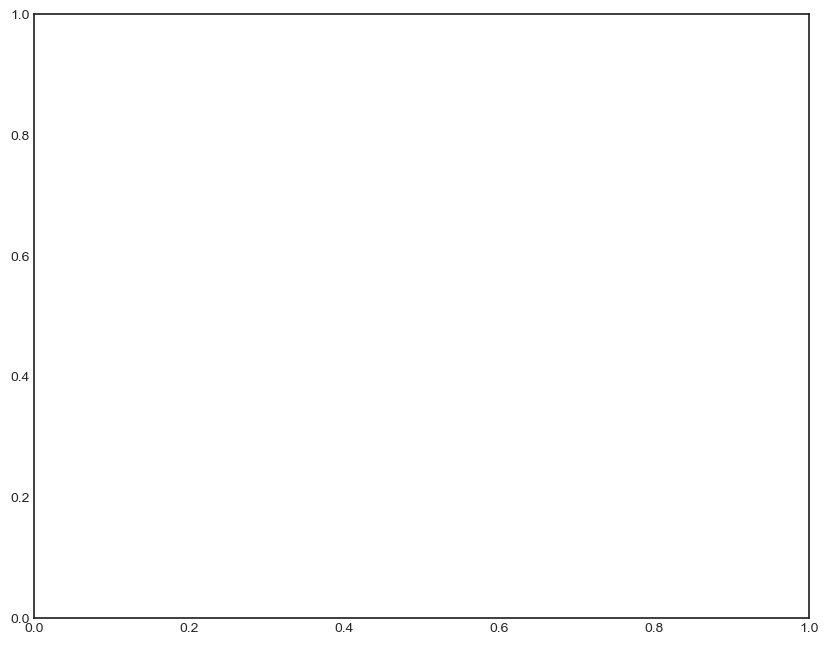

In [13]:
fs.plot_collinear(plot_all = True)

In [ ]:

fs.identify_collinear(correlation_threshold=1)
fs.plot_collinear()

In [ ]:

fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

In [ ]:

one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

In [ ]:
fs.data_all.head()

In [ ]:

zero_importance_features = fs.ops['zero_importance']
zero_importance_features
print(len(zero_importance_features))

In [ ]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 20)

In [ ]:
fs.feature_importances.head()

In [ ]:
one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
len(one_hundred_features)

In [ ]:
one_hundred_features


In [ ]:
fs.identify_low_importance(cumulative_importance = 0.99)

In [ ]:

low_importance_features = fs.ops['low_importance']
low_importance_features
len(low_importance_features)

In [ ]:

fs.identify_single_unique()

In [ ]:
single_unique = fs.ops['single_unique']
single_unique

In [ ]:
fs.plot_unique()

In [ ]:

fs.unique_stats.sample()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("update_dataset4.csv")
X = data.iloc[:,0:59]  #independent columns
y = data.iloc[:,-1]    #target column i.e found/notfound
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(60,'Score'))  #print 10 best features

[0.07656281 0.00927202 0.0035257  0.01422587 0.00627748 0.00824578
 0.00315733 0.01085023 0.00838847 0.00708344 0.0692317  0.02621896
 0.00619297 0.00366305 0.0257526  0.00398991 0.01494306 0.00212202
 0.00260812 0.00608717 0.0074889  0.01378955 0.0046644  0.00837122
 0.02098771 0.0043524  0.         0.00241537 0.00427842 0.01373925
 0.01330707 0.06038547 0.01289932 0.02036884 0.01770491 0.03327928
 0.02621018 0.06896967 0.09813949 0.08582799 0.02108003 0.00640278
 0.01810326 0.00416082 0.00564106 0.05131337 0.03495958 0.0228673
 0.00989365]


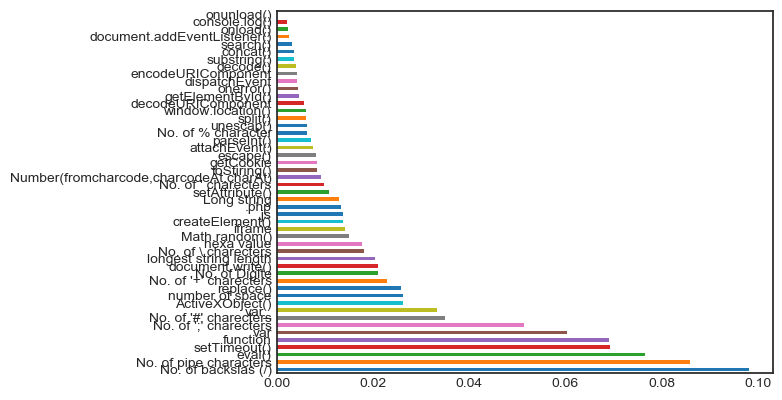

In [15]:
import pandas as pd
#import numpy as np
data = pd.read_csv("final_dataset2.csv")
X = data.iloc[:,0:49]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(51).plot(kind='barh')
plt.show()

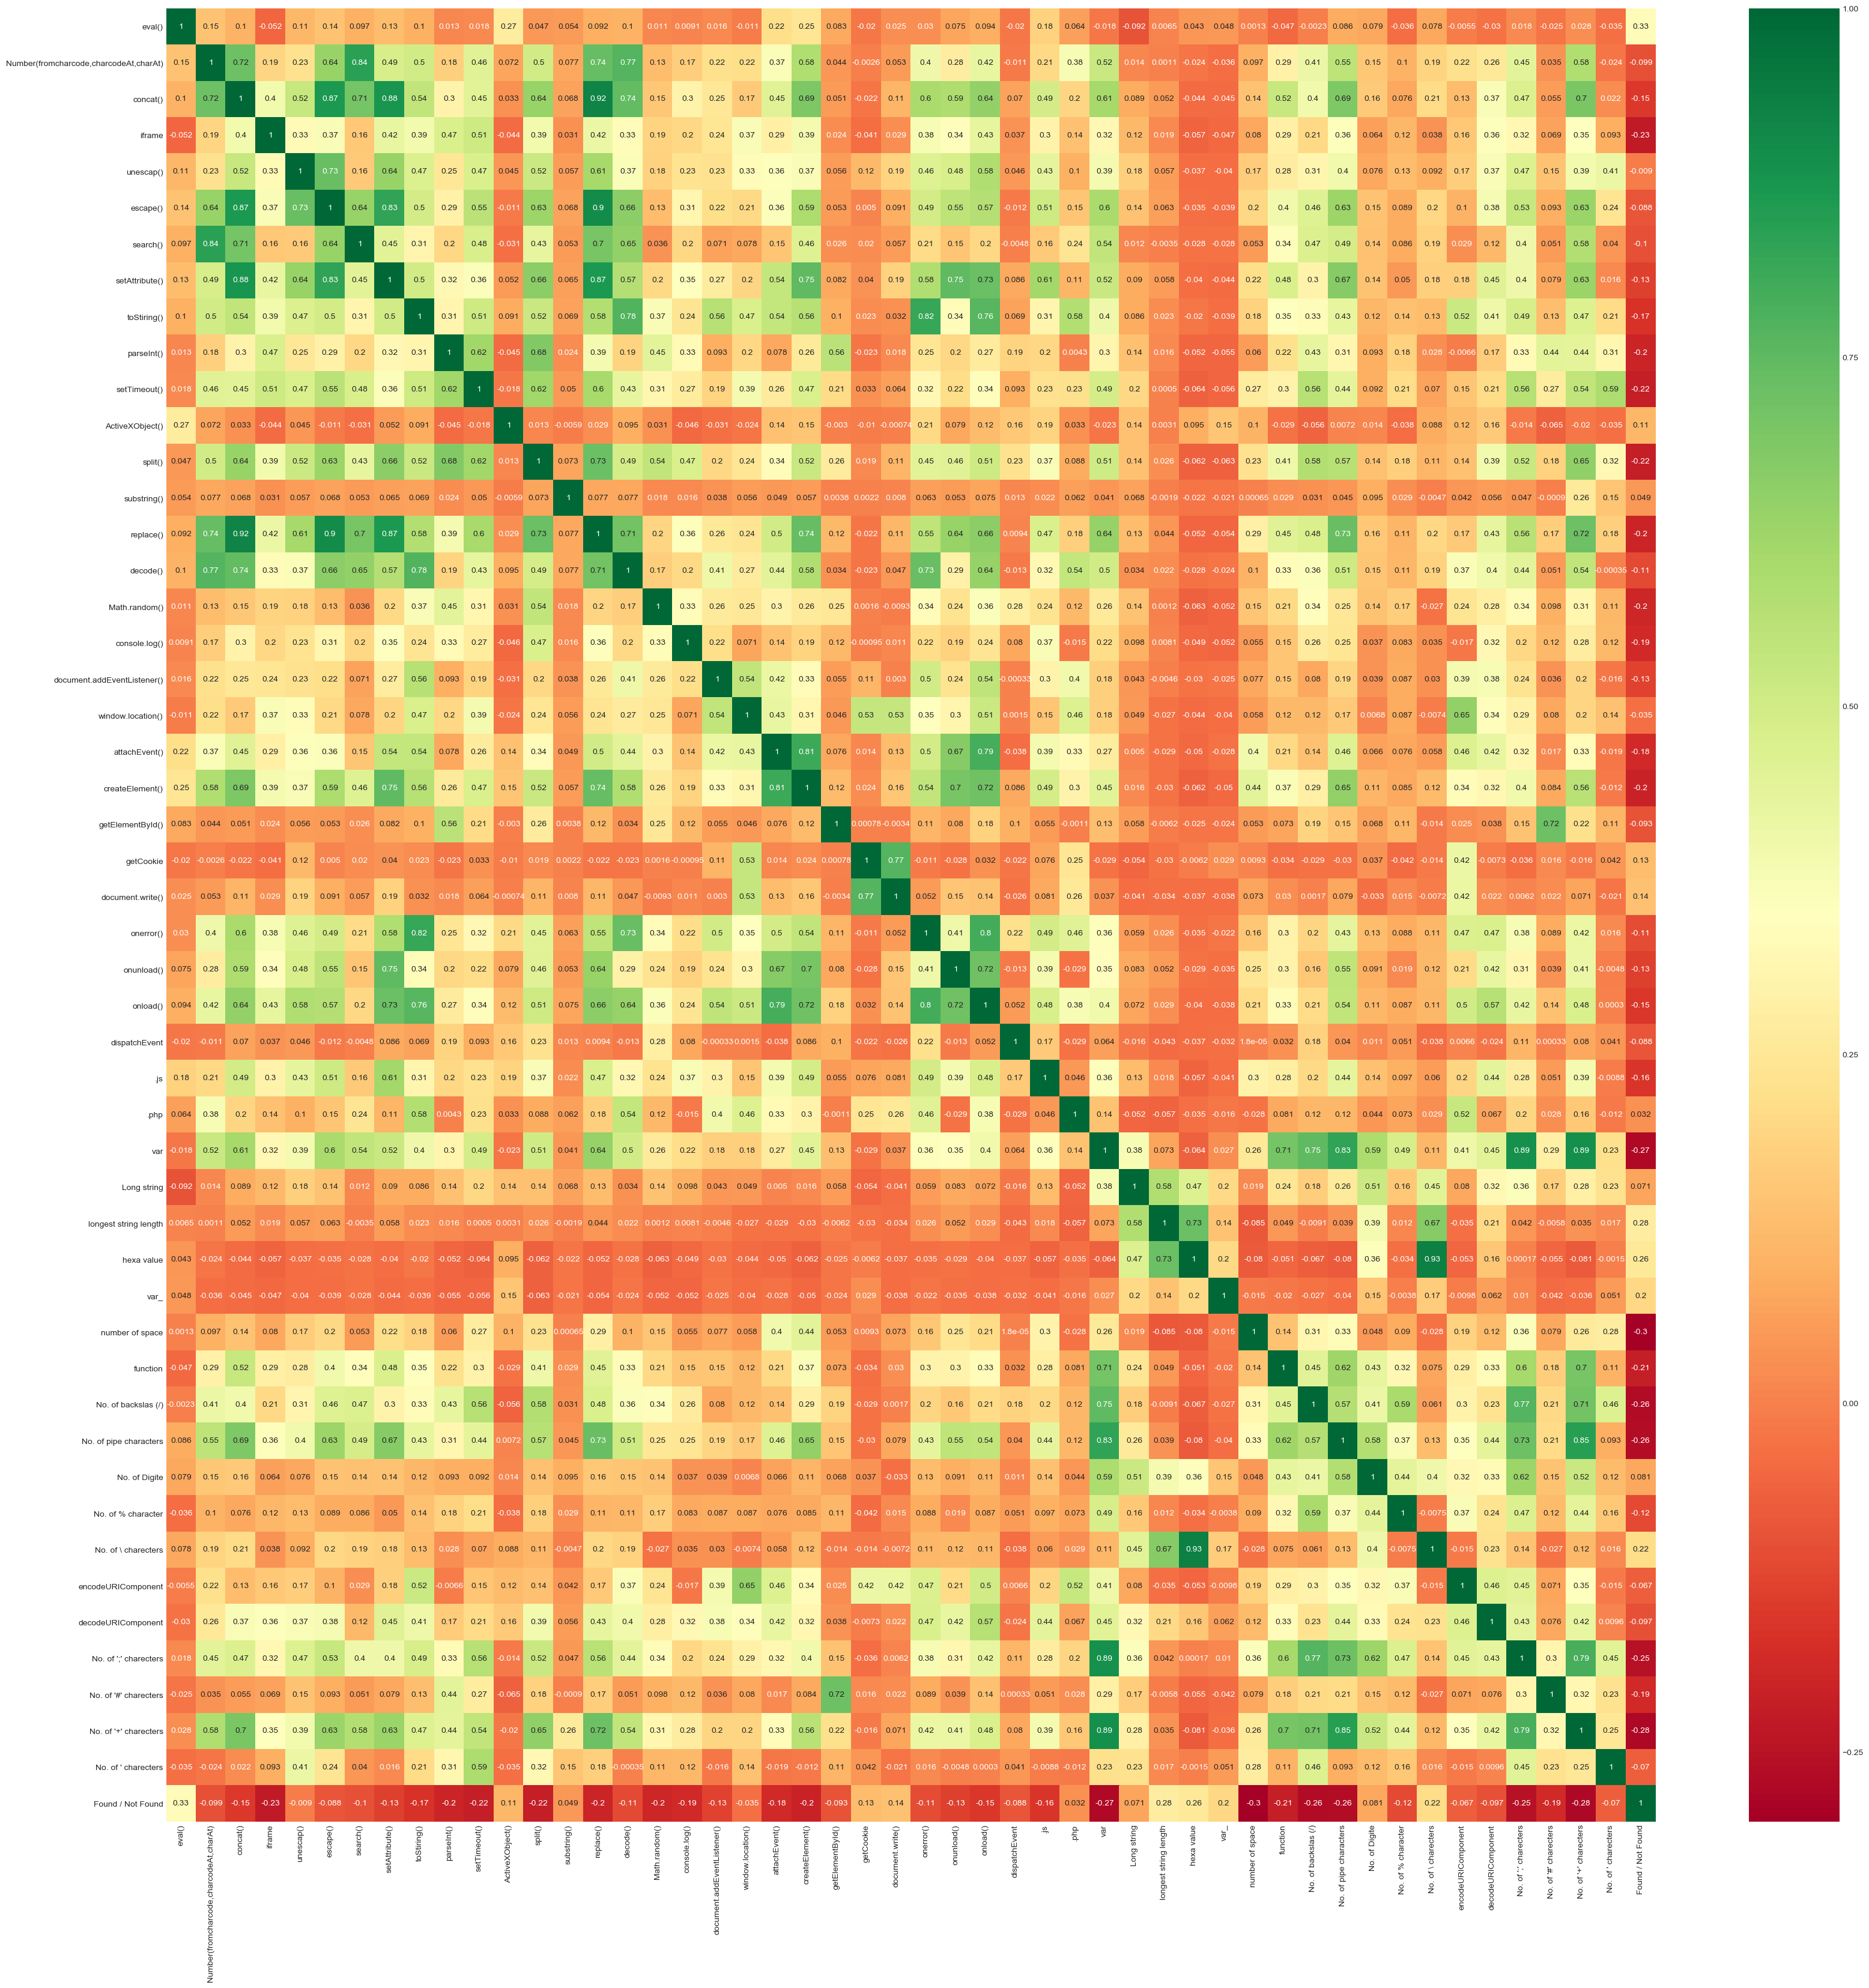

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("final_dataset2.csv")
X = data.iloc[:,0:49]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
plt.savefig('corepng.png', dpi=100)
# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('corepng.png', dpi=100)
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")